<a href="https://colab.research.google.com/github/irtiqamalik02/SpamFilter/blob/master/SpamFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#                        **NATURAL LANGUAGE PROCESSING: EMAIL SPAM FILTER**

 The dataset is a set of tagged messages that have been collected for Email Spam Research. It contains 5,574 messages in English that have been tagged as being ham (legitimate) or spam.
I'm building a model that will help to predicit if a particular message can be classified as spam or ham.


# IMPORT LIBRARIES # 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# IMPORT DATASET #

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
spam_df = pd.read_csv(io.BytesIO(uploaded['emails.csv']))

Saving emails.csv to emails.csv


In [ ]:
# Visualise first and last five entires
spam_df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
spam_df.tail(5)

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


The dataset file contains one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v0 contains the raw text.
The categorical data ham and spam labels have been encoded as '0' and '1' respectively.


In [ ]:
#Generate descriptive statistics.
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


It includes those that summarize the central tendency, dispersion and shape of a dataset’s distribution , excluding NaN values. The statistics gives us the count , mean , standard deviation along with the 25th to 75th percentile of the observations. 

In [ ]:
#Print a concise summary of a DataFrame
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


Since none of the values are NULL, we dont need to impute any missing data.

# EXPLORATORY DATA ANALYSIS #

**`Text Statistics Visualizations `**

In [ ]:
# Most popular Spam message
spam_df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: retail markets conference  i would li...    2
1     1368   1368  Subject: a better investment than the stock ma...    1

This message can later be tokenised to identify the most frequently occuring words in spam message.



In [ ]:
# Length of the messages
spam_df['length'] = spam_df['text'].apply(len)
spam_df.head()


,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


Here I added an additional length column that will show the length associated with each mail. From this column we realise that in general spam messages have more word count compared to ham messages.

**`Histogram`**

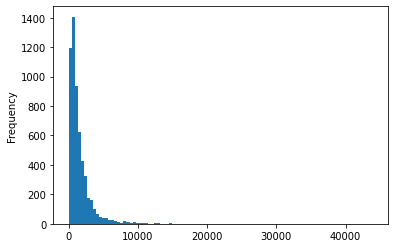

In [ ]:
# Number Of Characters Present In Emails
spam_df['length'].plot(bins=100, kind='hist') 

I used 100 bins in the histograms plot to inspect the underlying frequency distribution (eg. Normal distribution), outliers, skewness, etc. The histogram shows some observations are to the extreme right and different from the rest (i.e. Fat Tail). Hence, these need to be removed for better results.

**`Statistical Analysis for the 'length' column`**


In [ ]:
spam_df.length.describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [ ]:
# Displaying the longest message (i.e max= 43952)
spam_df[spam_df['length'] == 43952]['text'].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

Dividing the dataframe into two categories: ham and spam

In [ ]:
# Legitimate Emails
ham = spam_df[spam_df['spam']==0]
ham

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [ ]:
# SPAM Emails
spam = spam_df[spam_df['spam']==1]
spam

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


In [ ]:
# Histograms for Ham and Spam dataframes

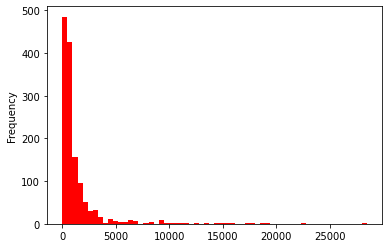

In [ ]:
spam['length'].plot(bins=60, kind='hist', color='red') 

The histogram shows that spam messages have an average length of 2000 characters. There is also a Fat Tail on the right side which can be due to 'stopwards' which will be removed during cleaning.

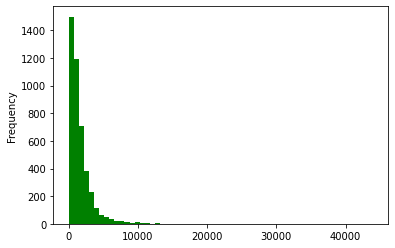

In [ ]:
ham['length'].plot(bins=60, kind='hist',color='green') 

The average word length is around 1500 words.


In [ ]:
#Percentage of spam emails
print( 'Spam percentage =', (len(spam) / len(spam_df) )*100,"%")

Spam percentage = 23.88268156424581 %


In [ ]:
#Percentage of ham emails
print( 'Ham percentage =', (len(ham) / len(spam_df) )*100,"%")

Ham percentage = 76.11731843575419 %


The percentages tell us that the datapoints in spam to ham ratio is 0.32, so the data is somewhat balanced.

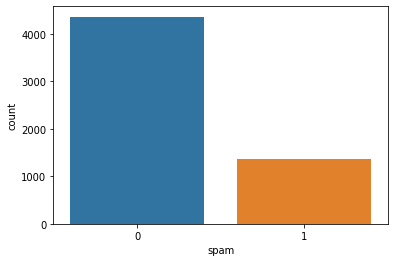

In [ ]:
#Show the counts of observations in each categorical bin using bars
sns.countplot(spam_df['spam'], label = "Count") 

The plot tells us that around 4500 elements have been classified as ham and 1200 have been classified as spam.


**`Ngram Exploration`**

In [ ]:
# Top N-grams Barchart

import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)


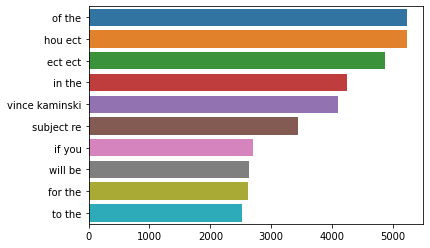

In [ ]:
# Bigram
plot_top_ngrams_barchart(spam_df['text'],2)

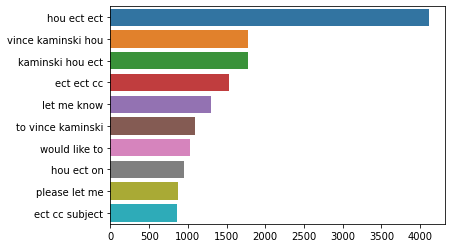

In [ ]:
# Trigram
plot_top_ngrams_barchart(spam_df['text'],3)

Ngrams are simply contiguous sequences of n words. Looking at most frequent n-grams gives a better understanding of the context in which the word was used

In [ ]:
# Wordcloud

import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS


def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


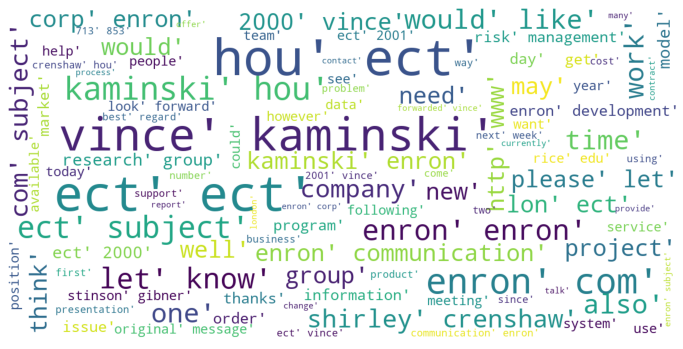

In [ ]:
plot_wordcloud(spam_df['text'])

**`Sentiment Analysis`**

In [ ]:
# TextBlob for Sentiment Analysis Barchart

from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


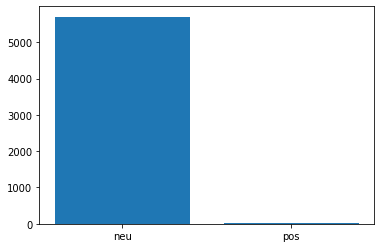

In [ ]:
plot_sentiment_barchart(spam_df['text'], method='Vader')

Since the text is actually email content, the majority is classified as neutral.

**`Named Entity Recognition`**

In [ ]:
# Named Entity Barchart

import spacy
from collections import  Counter
import seaborn as sns

def plot_named_entity_barchart(text):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)

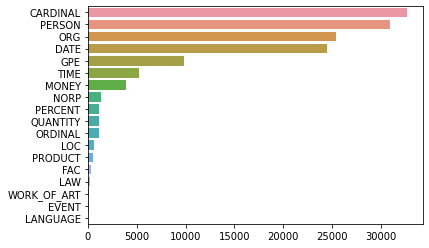

In [ ]:
plot_named_entity_barchart(spam_df['text'])

Using NER we can get great insights about the types of entities present in the given text dataset. Named entity recognition is an information extraction method in which entities that are present in the text are classified into predefined entity types like “Person”,” Place”,” Organization”, etc. 

# NATURAL LANGUAGE PROCESSING #

In [ ]:
# IMPORTING LIBRARIES FOR REMOVING PUNCTUATION
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# IMPORTING LIBRARIES FOR REMOVING STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

<BarContainer object of 10 artists>

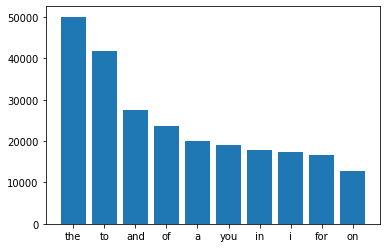

In [ ]:
# Plot Top Stopwords
stop=set(stopwords.words('english'))
corpus=[]
new= spam_df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

We can evidently see that stopwords such as “the”, ” to” and “and” dominate in emails.

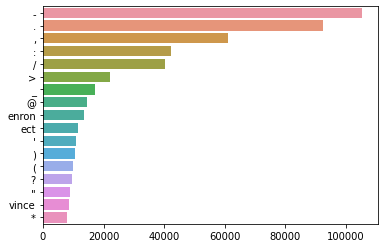

In [ ]:
# Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
plot_top_non_stopwords_barchart(spam_df['text'])

**` Pipeline To Clean Up All The Messages `**

In [ ]:
# The pipeline performs the following:
# (1) remove punctuation
# (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation] 
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
# Testing the newly added function
spam_df_clean = spam_df['text'].apply(message_cleaning)

In [ ]:
# Email Before Cleaning
print(spam_df['text'][0])

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

In [ ]:
# Email After Cleaning
print(spam_df_clean[0])

['Subject', 'naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'efforts', 'become', 'much', 'effective', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'drafts', 'within', 'three', 'business', 'days', 

In [ ]:
#COUNT VECTORIZER
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

Count Vectorizer is used to convert all the words within the data to a matrix which shows the frequency of occurence of various words. It is used for interpretation and classification of emotions within text data. It helps in classifying words as having positive or negative connotation.

In [ ]:
print(vectorizer.get_feature_names())

['\x01', '\x02', '\x03', '\x05', '\x06', '\x07', '\x08', '\x0f', '\x10', '\x12', '\x14', '\x15', '\x19', '0', '00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '

In [ ]:
print(spamham_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
spamham_countvectorizer.shape

(5728, 37229)

We've 5728 messages with 37229 columns/words.

# TRAINING THE MODEL USING THE ENTIRE DATASET #

In [ ]:
#MULTINOMIAL NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
label = spam_df['spam'].values
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Create sample texts for testing purpose
testing_sample = ['Free money!!!',"Hello, I am Irtiqa, I would like to book a hotel in SF by January 24th","Hi Kim, Please let me know if you need any further information. Thanks", "You've won a lottery!!"]
# Here the first and last mail should be classified as spam (1) and the rest as ham (0)

# Transform the raw data using countvectorizer
testing_sample_countvectorizer = vectorizer.transform(testing_sample)


In [ ]:
# TESTING 
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0, 0, 1])

# DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING #

In [ ]:
X = spamham_countvectorizer #input
y = label #output

In [ ]:
X.shape

(5728, 37229)

In [ ]:
y.shape

(5728,)

In [ ]:
# Divide the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# TRAINING THE MODEL
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# EVALUATING THE MODEL #

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

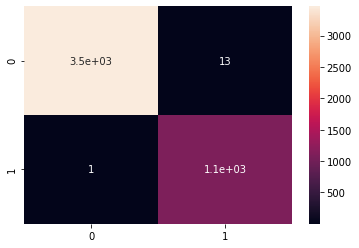

In [ ]:
#Confusion Matrix for Training 
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

From the heatmap we can see that our model was able to correctly classify 4600 emails and miss classified only 13 mails during training 

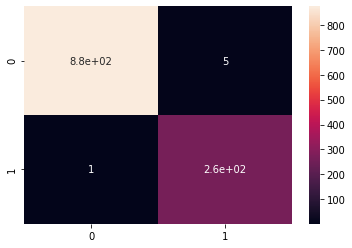

In [ ]:
# #Confusion Matrix for Testing
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

From the heatmap we can see that our model was able to correctly classify 11400 emails and miss classified only 16 mails during training. So the results are pretty good.

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test))

Accuracy: 0.9947643979057592


In [ ]:
#Classification Report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       880
           1       0.98      1.00      0.99       266

    accuracy                           0.99      1146
   macro avg       0.99      1.00      0.99      1146
weighted avg       0.99      0.99      0.99      1146



# ADDITIONAL FEATURE TEXT MINING (TF-IDF) #

 TF-IDF stands for "Term Frequency–Inverse Document Frequency" and is a numerical statistic used to reflect how important a word is to a document in a collection or corpus of documents. TFIDF is used as a weighting factor during text search processes and text mining.


In [ ]:
# Importing Libraries
from sklearn.feature_extraction.text import TfidfTransformer
emails_tfidf = TfidfTransformer().fit_transform(spamham_countvectorizer)
print(emails_tfidf.shape)

(5728, 37229)


In [ ]:
# Sparse matrix with all the values of IF-IDF
print(emails_tfidf[:,:])

  (0, 36565)	0.06908944889543289
  (0, 36432)	0.06757047739651872
  (0, 36430)	0.059679365326344706
  (0, 36025)	0.1319392730989776
  (0, 35034)	0.05233428188145157
  (0, 34800)	0.09384305652743173
  (0, 33562)	0.06921203533637368
  (0, 33037)	0.09490328795519132
  (0, 32843)	0.06073679014431701
  (0, 32617)	0.11152518721878715
  (0, 32602)	0.11962021118089677
  (0, 32319)	0.11962021118089677
  (0, 32263)	0.0789584619498058
  (0, 31968)	0.11850864343422601
  (0, 31959)	0.08499360588016656
  (0, 31547)	0.10454173100334828
  (0, 30218)	0.04607380847274443
  (0, 29858)	0.09333645170409068
  (0, 28879)	0.07691781511072393
  (0, 28266)	0.09213153238881405
  (0, 28110)	0.11014658587128429
  (0, 27986)	0.06591875520600377
  (0, 27225)	0.0732875367149963
  (0, 27224)	0.05761542024424838
  (0, 27122)	0.11082209685254277
  :	:
  (5727, 7921)	0.04309622276800823
  (5727, 7842)	0.09382800880629484
  (5727, 7841)	0.08777996676891853
  (5727, 5729)	0.5517795052228944
  (5727, 5629)	0.023897736992445

**`Training the model using the additional feature IF-IDF`**

In [ ]:
X = emails_tfidf
y = label

# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training 
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**`Evaluating The Model`**

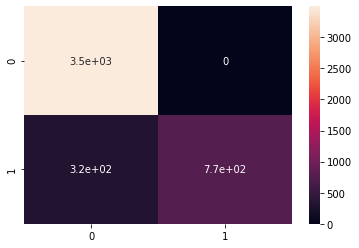

In [ ]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test))

Accuracy: 0.6178010471204188


In [ ]:
# Classification Report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       864
           1       0.21      0.20      0.21       282

    accuracy                           0.62      1146
   macro avg       0.48      0.48      0.48      1146
weighted avg       0.61      0.62      0.61      1146



We had higher accuracy and better results when we trained the model without this Term Frequency–Inverse Document Frequency (TF-IDF) feature extraction technique.